In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
np.random.seed(17)

In [5]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
(X_train.shape,X_train.dtype),(y_train.shape,y_train.dtype)

(((17412, 128, 128, 3), dtype('uint8')), ((17412, 2), dtype('float32')))

In [6]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
import tensorflow as tf

In [7]:
class LearningRateScheduler(tf.keras.callbacks.Callback):
    def __init__(self, schedule):
        super(LearningRateScheduler, self).__init__()
        self.schedule = schedule

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
        # Get the current learning rate from model's optimizer.
        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))
        # Call schedule function to get the scheduled learning rate.
        scheduled_lr = self.schedule(epoch, lr)
        # Set the value back to the optimizer before this epoch starts
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        print('\nEpoch %05d: Learning rate is %6.6f.' % (epoch, scheduled_lr))

In [9]:
LR_SCHEDULE = [
    # (epoch to start, learning rate) tuples
    (2, 1e-3), (5, 6e-4), (8, 2e-4), (12, 8e-5)
]

def lr_schedule(epoch, lr):
    if epoch < LR_SCHEDULE[0][0] or epoch > LR_SCHEDULE[-1][0]:
        return lr
    for i in range(len(LR_SCHEDULE)):
        if epoch == LR_SCHEDULE[i][0]:
            return LR_SCHEDULE[i][1]
    return lr

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,
                 kernel_size=(6,6),
                 padding='same',
                 input_shape=(128,128,3), 
                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=36,
                 kernel_size=(6,6),
                 padding='same',
                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=48,
                 kernel_size=(6,6),
                 padding='same',
                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      1744      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 36)        20772     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 48)        62256     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12288)             0

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-6), loss='categorical_crossentropy', metrics=['accuracy']) 
train_history = model.fit(X_train,y_train,batch_size=16,epochs=16,verbose=1,validation_split=0.2,callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/16

Epoch 00000: Learning rate is 0.000001.
871/871 [==============================] - 32s 30ms/step - loss: 21.5972 - accuracy: 0.5059 - val_loss: 2.0601 - val_accuracy: 0.5515
Epoch 2/16

Epoch 00001: Learning rate is 0.000001.
871/871 [==============================] - 25s 29ms/step - loss: 10.4546 - accuracy: 0.5104 - val_loss: 1.1439 - val_accuracy: 0.5670
Epoch 3/16

Epoch 00002: Learning rate is 0.001000.
871/871 [==============================] - 25s 29ms/step - loss: 1.3005 - accuracy: 0.5500 - val_loss: 0.6374 - val_accuracy: 0.6342
Epoch 4/16

Epoch 00003: Learning rate is 0.001000.
871/871 [==============================] - 25s 29ms/step - loss: 0.5841 - accuracy: 0.6739 - val_loss: 0.2379 - val_accuracy: 0.9400
Epoch 5/16

Epoch 00004: Learning rate is 0.001000.
871/871 [==============================] - 25s 29ms/step - loss: 0.2663 - accuracy: 0.9186 - val_loss: 0.2123 - val_accuracy: 0.9512
Epoch 6/16

Epoch 00005: Learning rate is 0.000600.
871/871 [============

In [12]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy/loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

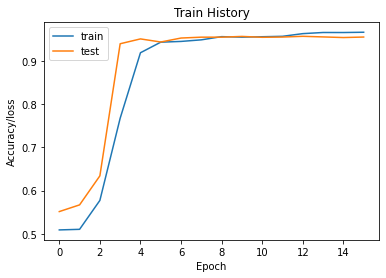

In [13]:
show_train_history('accuracy','val_accuracy')

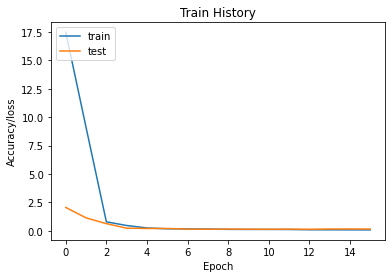

In [14]:
show_train_history('loss','val_loss')

In [ ]:
del X_train, y_train

In [15]:
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
# X_test = (X_test/255).astype('float32')
(X_test.shape,X_test.dtype),(y_test.shape,y_test.dtype)

(((4353, 128, 128, 3), dtype('uint8')), ((4353, 2), dtype('float32')))

In [16]:
X_test.min(),X_test.max()

(0, 255)

In [17]:
eva = model.evaluate(X_test,y_test)
print('loss: ',eva[0],'accuracy: ',eva[1])

137/137 [==============================] - 2s 15ms/step - loss: 0.1372 - accuracy: 0.9607
loss:  0.13717465102672577 accuracy:  0.960716724395752


In [ ]:
model.save('malaria_cnn.h5')